====================================================================

# **Student Performance Analysis**
* Nama = Fadhil Athallah
* Batch = HCK-015

Program ini digunakan untuk manganalisis variabel apa saja yang memepengaruhi nilai rata-rata pada sebuah sekolah

====================================================================

Link tableau : https://public.tableau.com/views/Fadhil_Athallah_M1/AnalasisVariabelPengaruhNilaiUjian?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

Link kaggle : https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

# **Identifikasi masalah**

## Dataset


Dataset yang digunakan dalam project ini adalah dataset nilai murid pada sebuah sekolah. Dataset ini berisi 1000 baris dengan 8 kolom yang diantaranya adalah gender, race_ethnicity, parental_level_education, lunch, test_preparation_course, math_score, rading_score, writing_score. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance).
Keterangan pada kolom pada dataset ini adalah:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Gender                  | Gender dari murid                                                                                                     |
| race_ethnicity                  | Etnis dari murid                                                   |
| Parental_level_education                    | Pendidikan terakhir orang tua                                                                                                    |
| Lunch           |Kondisi apakah murid makan dengan normal atau mengurangi samapai tidak makan sama sekali 
| test_preparation_course                  | Apakah murid mengikuti kelas tambahan ujian atau tidak                                                                                                                                        |
| math_score          | Nilai matematika murid |
| reading_score              | Nilai membaca murid                                                                                                                                     |
| writing_score                | Nilai menulis murid                                                                                                               |
       

## Case

Kamu adalah seorang data analyst yang sedang mendapatkan project dari Sekolah Harapan . Sekolah Harapan ingin mengetahui apa saja variabel yang mempengaruhi nilai para muridnya. Dari sini kamu berusahan mencari apa saja variabel yang berpengaruh dengan harapan dapat memberikan masukan untuk menigkatkan rata-rata nilai siswa pada tiap mata pelajaran yang dianalisa.

## SMART Analysis


* S = Mencari variabel yang berpengaruh terhadap nilai siswa
* M = Menigkatkan rata-rata nilai siswa menjadi 70
* A = Menganalisis etnis siswa, pendidikan orangtua, tugas persiapan ujian, dan makan siang terhadap nilai siswa
* R = Variabel berpengaruh dapat dimanfaatkan untuk meningkatkan nilai ujian
* T = 6 Bulan 

Problem statement :
* Mencari variabel yang berpengaruh terhadap nilai siswa untuk dimanfaatkan dalam meningkatkan rata-rata nilai siswa menjadi 70 dengan target pengerjaan 6 bulan

## Penjabaran Masalah

Main problem: Mencaari variabel yang berpengaruh kepada nilai 

The 5W+1Hs:

* Apa saja variabel yang mempangaruhi nilai 
* Nilai siapa saja yang dianalisis
* Bagaimana variabel -variabel mempengaruhi nilai
* Mengapa faktor tersebut mempengaruhi nilai 



# **Data Loading**


## Setup

In [2]:
# Setup modul phyton  
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import psycopg2
import matplotlib.pyplot as plt


* import modul phyton telah berhasil dilakukan


## Mengambil data dari sql

In [3]:
# Connect SQL
db_user = "postgres" #user sql
db_password = "admin" # password  user
db_host = "localhost" # host 
db_port = "5432" # port sql

connection = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port,
    database="milestone_1" # nama database 
)

cursor = connection.cursor()
# variabel query 
query = "SELECT * FROM study_performance;"

* koneksi ke sql tersambung, langkah selanjutnya adalah pembuatan data sql menjadi dataframe

## Dataframe

In [4]:
# pandas dataframe query 
df = pd.read_sql(query, connection)
df

C:\Users\Fadhil\AppData\Local\Temp\ipykernel_12148\554216048.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


* Dataframe sudah terbentuk 

# **Data Cleaning**

## Pengecekan isi data

In [5]:
# Melihat info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* Dari hasil info, didapatkan bahwa terdapat masing-masing 1000 data untuk tiap kolom dan tipe data dari tiap kolom sudah sesuai

## Pengecekan dan Penghapusan Nilai Null

In [6]:
# Jumlah nilai null pada tiap kolom 
df.dropna()
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* Dari output didapati bahwa pada data tidak terdapat nilai null sehingga penghapusan nilai null tidak perlu dilakukan

## Pengecekan dan Penghapusan Nilai Duplikat

In [7]:
# Melihat jumlah duplikat
df.drop_duplicates()
df.duplicated().sum()

0

* Dari output didapati bahwa pada data tidak terdapat nilai duplikat sehingga penghapusan nilai duplikat tidak perlu dilakukan 

In [8]:
# Variabel cleaned
df_cleaned = df
df_cleaned

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


* Pembuatan variabel baru yang menunjukkan bahwa data sudah clean 

# **Analisis dan perhitungan**

## Persebaran Data nilai siswa

### Skewness dan Kurtosis

In [9]:
# Skew dan kurtosis math score
print('math skew :',df_cleaned['math_score'].skew())
print('math kurt :',df_cleaned['math_score'].kurt())
print('------------------------------------------------------------')
# Skew dan kurtosis math score
print('reading skew :',df_cleaned['reading_score'].skew())
print('reading kurt :',df_cleaned['reading_score'].kurt())
print('------------------------------------------------------------')
# Skew dan kurtosis math score
print('writing skew :',df_cleaned['writing_score'].skew())
print('writing kurt :',df_cleaned['writing_score'].kurt())

math skew : -0.27893514909431694
math kurt : 0.27496405752108455
------------------------------------------------------------
reading skew : -0.25910451810923063
reading kurt : -0.0682654585647704
------------------------------------------------------------
writing skew : -0.28944397150761897
writing kurt : -0.03336461500693577


* Ketiga nilai merupakan distribusi negative highly skewed yang artinya masih ada beberapa siswa yang memiliki nilai jauh dibawah dari distribusi normal

### Bentuk distribusi data

#### Math Score

<Axes: >

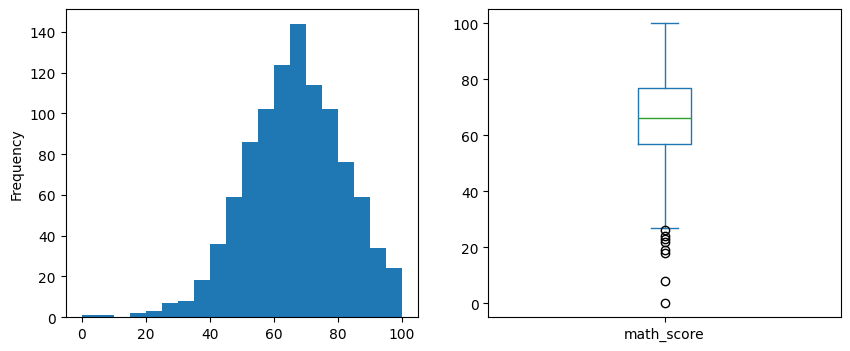

In [10]:
# Ukuran gambar 
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# Plotting math score
df_cleaned['math_score'].plot(kind='hist',bins=20,ax=ax[0])
df_cleaned['math_score'].plot(kind='box',ax=ax[1])

#### Reading Score

<Axes: >

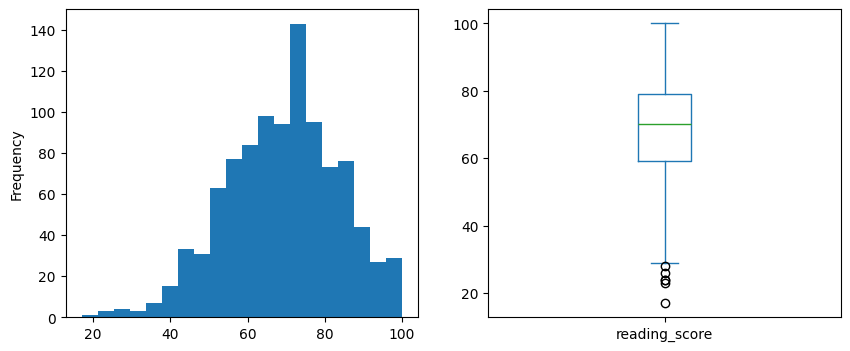

In [11]:
# Ukuran gambar 
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# Plotting reading score
df_cleaned['reading_score'].plot(kind='hist',bins=20,ax=ax[0])
df_cleaned['reading_score'].plot(kind='box',ax=ax[1])

#### Writing Score

<Axes: >

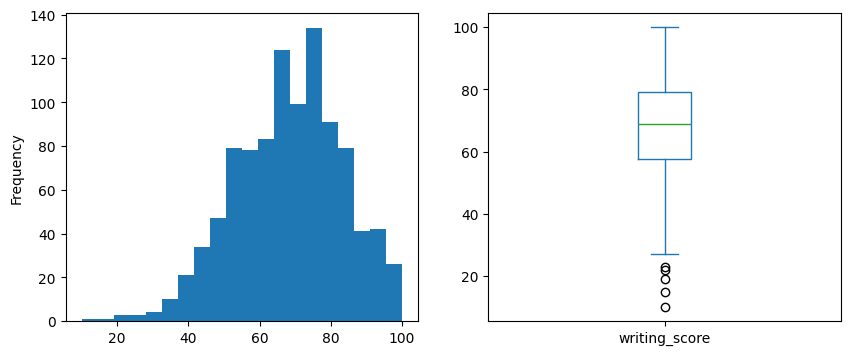

In [12]:
# Ukuran gambar 
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# Plotting reading score
df_cleaned['writing_score'].plot(kind='hist',bins=20,ax=ax[0])
df_cleaned['writing_score'].plot(kind='box',ax=ax[1])

#### Analisis distribusi

Dari hasil distribusi nilai didapatkan persebaran nilai ekstrim pada bagian kiri distribusi. Hal ini menunjukkan bahwa masih ada beberapa siswa yang memiliki nilai jauh dibawah dari distribusi normal nilai. Beberapa siswa ini perlu perhatian khusus dalam mengejar ketertinggalan nilai. Untuk perebaran normalnya, siswa memiliki persebaran pada nilai seperti pada grafik tukey

## Nilai Tengah Ujian Siswa

In [13]:
# mean, std, min, max, dan quartile nilai math 
print('                     MATH                  ')
print(df_cleaned['math_score'].describe())
print('-----------------------------------------------------------')
# mean, std, min, max, dan quartile nilai reading 
print('                     Reading                  ')
print(df_cleaned['reading_score'].describe())
print('-----------------------------------------------------------')
# mean, std, min, max, dan quartile nilai writing 
print('                     Writing                  ')
print(df_cleaned['writing_score'].describe())


                     MATH                  
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64
-----------------------------------------------------------
                     Reading                  
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64
-----------------------------------------------------------
                     Writing                  
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


**Analisis**
* rata-rata ketiga pelajaran berkisar dari 66 - 68. Dimana untuk mencapai tujuan rata-rata harus ditingkatkan +- 2 sampai 4 skor
* Nilai terendah berkisar dari 0 - 17 dan nilai tertinggi adalah 100. Nilai ujian tiap murid ini masih memiliki jarak yang terlalu jauh dan menyebabkan rata-rata menjadi rendah. 

## Mencari Hubungan Variabel


### Uji Hipotesa Anova

Hubungan antar variabel akan diuji dengan menggunakan metode ANOVA. Metode ini digunakan untuk mencari hubungan antar variabel terhadap hubungan rata-rata tiap nilai terhadap variabel yang diuji

#### **Pendidikan orang tua dengan nilai siswa**

In [14]:
# uji normal
res = stats.shapiro(df_cleaned['math_score'])
print(f'p-value: {res.pvalue}') 

p-value: 0.00014545719606603633


In [15]:
# Mencati unique value parent education
df_cleaned['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

##### **Nilai matematika**

In [16]:
# Memasukkan data nilai untuk tiap category pendidikan 
bachelors_degree_math = df_cleaned['math_score'][(df_cleaned['parental_level_of_education']=="bachelor's degree")]
some_college_math = df_cleaned['math_score'][df_cleaned['parental_level_of_education']=='some college']
masters_degree_math = df_cleaned['math_score'][(df_cleaned['parental_level_of_education']=="master's degree")]
associates_degree_math = df_cleaned['math_score'][(df_cleaned['parental_level_of_education']=="associate's degree")]
high_school_math = df_cleaned['math_score'][(df_cleaned['parental_level_of_education']=='high school')]
some_high_school_math = df_cleaned['math_score'][(df_cleaned['parental_level_of_education']=='some high school')]

# Menampilkan hasil rata-rata tiap categori pendidikan terhadap nilai math
print(f"Average math score dari kelompok barchelor's degree: {bachelors_degree_math.mean():.2f}")
print(f"Average math score dari kelompok some collage: {some_college_math.mean():.2f}")
print(f"Average math score dari kelompok master's degree: {masters_degree_math.mean():.2f}")
print(f"Average math score dari kelompok associate's degree's : {associates_degree_math.mean():.2f}")
print(f"Average math score dari kelompok high school: {high_school_math.mean():.2f}")
print(f"Average math score dari kelompok some high school: {some_high_school_math.mean():.2f}")


Average math score dari kelompok barchelor's degree: 69.39
Average math score dari kelompok some collage: 67.13
Average math score dari kelompok master's degree: 69.75
Average math score dari kelompok associate's degree's : 67.88
Average math score dari kelompok high school: 62.14
Average math score dari kelompok some high school: 63.50


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai math untuk keenam jenis tingkat pendidikan orangtua
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai math untuk keenam jenis tingkat pendidikan orangtua

In [17]:
# Anova
res = stats.f_oneway(bachelors_degree_math, some_college_math, masters_degree_math, associates_degree_math, high_school_math, some_high_school_math)
print('P-value:',res.pvalue)

P-value: 5.592272384107223e-06


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai math terhadap tingkat pendidikan orang tua memiliki perbedaan rata - rata yang signifikan 

##### **Nilai reading**

In [18]:
# Memasukkan data nilai untuk tiap category pendidikan 
bachelors_degree_reading = df_cleaned['reading_score'][(df_cleaned['parental_level_of_education']=="bachelor's degree")]
some_college_reading = df_cleaned['reading_score'][df_cleaned['parental_level_of_education']=='some college']
masters_degree_reading = df_cleaned['reading_score'][(df_cleaned['parental_level_of_education']=="master's degree")]
associates_degree_reading = df_cleaned['reading_score'][(df_cleaned['parental_level_of_education']=="associate's degree")]
high_school_reading = df_cleaned['reading_score'][(df_cleaned['parental_level_of_education']=='high school')]
some_high_school_reading = df_cleaned['reading_score'][(df_cleaned['parental_level_of_education']=='some high school')]

# Menampilkan hasil rata-rata tiap categori pendidikan terhadap nilai reading
print(f"Average reading score dari kelompok barchelor's degree: {bachelors_degree_reading.mean():.2f}")
print(f"Average reading score dari kelompok some collage: {some_college_reading.mean():.2f}")
print(f"Average reading score dari kelompok master's degree: {masters_degree_reading.mean():.2f}")
print(f"Average reading score dari kelompok associate's degree's : {associates_degree_reading.mean():.2f}")
print(f"Average reading score dari kelompok high school: {high_school_reading.mean():.2f}")
print(f"Average reading score dari kelompok some high school: {some_high_school_reading.mean():.2f}")

Average reading score dari kelompok barchelor's degree: 73.00
Average reading score dari kelompok some collage: 69.46
Average reading score dari kelompok master's degree: 75.37
Average reading score dari kelompok associate's degree's : 70.93
Average reading score dari kelompok high school: 64.70
Average reading score dari kelompok some high school: 66.94


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk keenam jenis tingkat pendidikan orangtua
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk keenam jenis tingkat pendidikan orangtua

In [19]:
# Anova
res = stats.f_oneway(bachelors_degree_reading, some_college_reading, masters_degree_reading, associates_degree_reading, high_school_reading, some_high_school_reading)
print('P-value:',res.pvalue)

P-value: 1.16824570457051e-08


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai reading terhadap tingkat pendidikan orang tua memiliki perbedaan rata - rata yang signifikan 

##### **Nilai writing**

In [20]:
# Memasukkan data nilai untuk tiap category pendidikan 
bachelors_degree_writing = df_cleaned['writing_score'][(df_cleaned['parental_level_of_education']=="bachelor's degree")]
some_college_writing = df_cleaned['writing_score'][df_cleaned['parental_level_of_education']=='some college']
masters_degree_writing = df_cleaned['writing_score'][(df_cleaned['parental_level_of_education']=="master's degree")]
associates_degree_writing = df_cleaned['writing_score'][(df_cleaned['parental_level_of_education']=="associate's degree")]
high_school_writing = df_cleaned['writing_score'][(df_cleaned['parental_level_of_education']=='high school')]
some_high_school_writing = df_cleaned['writing_score'][(df_cleaned['parental_level_of_education']=='some high school')]

# Menampilkan hasil rata-rata tiap categori pendidikan terhadap nilai writing
print(f"Average writing score dari kelompok barchelor's degree: {bachelors_degree_writing.mean():.2f}")
print(f"Average writing score dari kelompok some collage: {some_college_writing.mean():.2f}")
print(f"Average writing score dari kelompok master's degree: {masters_degree_writing.mean():.2f}")
print(f"Average writing score dari kelompok associate's degree's : {associates_degree_writing.mean():.2f}")
print(f"Average writing score dari kelompok high school: {high_school_writing.mean():.2f}")
print(f"Average writing score dari kelompok some high school: {some_high_school_writing.mean():.2f}")

Average writing score dari kelompok barchelor's degree: 73.38
Average writing score dari kelompok some collage: 68.84
Average writing score dari kelompok master's degree: 75.68
Average writing score dari kelompok associate's degree's : 69.90
Average writing score dari kelompok high school: 62.45
Average writing score dari kelompok some high school: 64.89


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk keenam jenis tingkat pendidikan orangtua
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk keenam jenis tingkat pendidikan orangtua

In [21]:
# Anova
res = stats.f_oneway(bachelors_degree_reading, some_college_reading, masters_degree_reading, associates_degree_reading, high_school_reading, some_high_school_reading)
print('P-value:',res.pvalue)

P-value: 1.16824570457051e-08


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai writing terhadap tingkat pendidikan orang tua memiliki perbedaan rata - rata yang signifikan 

#### **Gender dengan nilai siswa**

In [22]:
# Mencati unique value gender
df_cleaned['gender'].unique()

array(['female', 'male'], dtype=object)

##### **Nilai matematika**

In [23]:
# Memasukkan data nilai untuk tiap category pendidikan 
gender_male_math = df_cleaned['math_score'][(df_cleaned['gender']=='male')]
gender_female_math = df_cleaned['math_score'][df_cleaned['gender']=='female']

# Menampilkan hasil rata-rata tiap categori pendidikan terhadap nilai math
print(f"Average math score dari kelompok murid pria: {gender_male_math.mean():.2f}")
print(f"Average math score dari kelompok murid wanita: {gender_female_math.mean():.2f}")


Average math score dari kelompok murid pria: 68.73
Average math score dari kelompok murid wanita: 63.63


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki-laki dan perempuan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki - laki dan perempuan

In [24]:
# Anova
res = stats.f_oneway(gender_male_math, gender_female_math)
print('P-value:',res.pvalue)

P-value: 9.120185549332254e-08


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai math terhadap gender memiliki perbedaan rata - rata yang signifikan 

##### **Nilai Reading**

In [25]:
# Memasukkan data nilai untuk tiap category gender 
gender_male_reading = df_cleaned['reading_score'][(df_cleaned['gender']=='male')]
gender_female_reading = df_cleaned['reading_score'][df_cleaned['gender']=='female']

# Menampilkan hasil rata-rata tiap categori gender terhadap nilai reading
print(f"Average reading score dari kelompok murid pria: {gender_male_reading.mean():.2f}")
print(f"Average reading score dari kelompok murid wanita: {gender_female_reading.mean():.2f}")

Average reading score dari kelompok murid pria: 65.47
Average reading score dari kelompok murid wanita: 72.61


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki-laki dan perempuan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki - laki dan perempuan

In [26]:
# Anova
res = stats.f_oneway(gender_male_reading, gender_female_reading)
print('P-value:',res.pvalue)

P-value: 4.680538743935705e-15


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai reading terhadap tingkat pendidikan orang tua memiliki perbedaan rata - rata yang signifikan 

##### **Nilai Writing**

In [27]:
# Memasukkan data nilai untuk tiap category gender 
gender_male_writing = df_cleaned['writing_score'][(df_cleaned['gender']=='male')]
gender_female_writing = df_cleaned['writing_score'][df_cleaned['gender']=='female']

# Menampilkan hasil rata-rata tiap categori gender terhadap nilai writing
print(f"Average writing score dari kelompok murid pria: {gender_male_writing.mean():.2f}")
print(f"Average writing score dari kelompok murid wanita: {gender_female_writing.mean():.2f}")

Average writing score dari kelompok murid pria: 63.31
Average writing score dari kelompok murid wanita: 72.47


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki-laki dan perempuan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk laki - laki dan perempuan

In [28]:
# Anova
res = stats.f_oneway(gender_male_writing, gender_female_writing)
print('P-value:',res.pvalue)

P-value: 2.0198777068688722e-22


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai math terhadap tingkat pendidikan orang tua memiliki perbedaan rata - rata yang signifikan 

#### **Etnis dengan nilai siswa**

In [29]:
# Mencati unique value entis
df_cleaned['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

##### Nilai matematika 

In [30]:
# Memasukkan data nilai untuk tiap category etnis 
group_B_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group B']
group_C_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group C']
group_A_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group A']
group_D_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group D']
group_E_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group E']

# Menampilkan hasil rata-rata tiap categori gender terhadap nilai nath
print(f"Average math score dari students pada etnis group B: {group_B_math.mean():.2f}")
print(f"Average math score dari students pada etnis group C: {group_C_math.mean():.2f}")
print(f"Average math score dari students pada etnis group A: {group_A_math.mean():.2f}")
print(f"Average math score dari students pada etnis group D: {group_D_math.mean():.2f}")
print(f"Average math score dari students pada etnis group E: {group_E_math.mean():.2f}")

Average math score dari students pada etnis group B: 63.45
Average math score dari students pada etnis group C: 64.46
Average math score dari students pada etnis group A: 61.63
Average math score dari students pada etnis group D: 67.36
Average math score dari students pada etnis group E: 73.82


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai math tiap kelompok etnis
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai math tiap kelompok etnis

In [31]:
# Anova
res = stats.f_oneway(group_A_math, group_B_math,group_C_math,group_D_math, group_E_math )
print('P-value:',res.pvalue)

P-value: 1.3732194030370688e-11


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai math terhadap kelompok etnis memiliki perbedaan rata - rata yang signifikan 

##### Nilai Reading

In [32]:
# Memasukkan data nilai untuk tiap category etnis 
group_B_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group B']
group_C_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group C']
group_A_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group A']
group_D_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group D']
group_E_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group E']

# Menampilkan hasil rata-rata tiap categori gender terhadap nilai reading
print(f"Average reading score dari students pada etnis group B: {group_B_reading.mean():.2f}")
print(f"Average reading score dari students pada etnis group C: {group_C_reading.mean():.2f}")
print(f"Average reading score dari students pada etnis group A: {group_A_reading.mean():.2f}")
print(f"Average reading score dari students pada etnis group D: {group_D_reading.mean():.2f}")

Average reading score dari students pada etnis group B: 67.35
Average reading score dari students pada etnis group C: 69.10
Average reading score dari students pada etnis group A: 64.67
Average reading score dari students pada etnis group D: 70.03


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai reading tiap kelompok etnis
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai reading tiap kelompok etnis

In [33]:
# Anova
res = stats.f_oneway(group_A_reading, group_B_reading,group_C_reading,group_D_reading, group_E_reading )
print('P-value:',res.pvalue)

P-value: 0.0001780089103235947


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai reading terhadap kelompok etnis memiliki perbedaan rata - rata yang signifikan 

##### Nilai Writing


In [34]:
# Memasukkan data nilai untuk tiap category etnis 
group_B_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group B']
group_C_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group C']
group_A_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group A']
group_D_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group D']
group_E_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group E']

# Menampilkan hasil rata-rata tiap categori gender terhadap nilai reading
print(f"Average writing score dari students pada etnis group B: {group_B_writing.mean():.2f}")
print(f"Average writing score dari students pada etnis group C: {group_C_writing.mean():.2f}")
print(f"Average writing score dari students pada etnis group A: {group_A_writing.mean():.2f}")
print(f"Average writing score dari students pada etnis group D: {group_D_writing.mean():.2f}")

Average writing score dari students pada etnis group B: 65.60
Average writing score dari students pada etnis group C: 67.83
Average writing score dari students pada etnis group A: 62.67
Average writing score dari students pada etnis group D: 70.15


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing tiap kelompok etnis
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing tiap kelompok etnis

In [35]:
# Anova
res = stats.f_oneway(group_A_writing, group_B_writing,group_C_writing,group_D_writing, group_E_writing )
print('P-value:',res.pvalue)

P-value: 1.0979189070067382e-05


**Analisis Hasil**
* P-value kurang dari 0.05, H(0) ditolak artinya rata - rata nilai writing terhadap kelompok etnis memiliki perbedaan rata - rata yang signifikan 

#### **Lunch terhadap nilai siswa**

In [36]:
# Mencati unique value lunch
df_cleaned['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

##### Nilai Matematika

In [37]:
# Memasukkan data nilai untuk tiap category lunch
standard_math = df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group B']
free_reduced_math= df_cleaned['math_score'][df_cleaned['race_ethnicity']=='group C']


# Menampilkan hasil rata-rata tiap categori lunch terhadap nilai reading
print(f"Average math score dari students yang makan siang: {group_B_math.mean():.2f}")
print(f"Average math score dari students yang mengurangi/tidak makan siang: {group_C_math.mean():.2f}")


Average math score dari students yang makan siang: 63.45
Average math score dari students yang mengurangi/tidak makan siang: 64.46


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student yang makan siang
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student yang mengurangi/tidak makan siang

In [38]:
# Anova
res = stats.f_oneway(standard_math, free_reduced_math)
print('P-value:',res.pvalue)

P-value: 0.46477089391675075


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) diterima artinya rata - rata nilai math terhadap makan siang memiliki perbedaan rata - rata yang tidak signifikan 

##### Nilai Reading

In [39]:
# Memasukkan data nilai untuk tiap category lunch
standard_reading = df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group B']
free_reduced_reading= df_cleaned['reading_score'][df_cleaned['race_ethnicity']=='group C']


# Menampilkan hasil rata-rata tiap categori lunch terhadap nilai reading
print(f"Average reading score dari students yang makan siang: {group_B_reading.mean():.2f}")
print(f"Average reading score dari students yang mengurangi/tidak makan siang: {group_C_reading.mean():.2f}")

Average reading score dari students yang makan siang: 67.35
Average reading score dari students yang mengurangi/tidak makan siang: 69.10


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student yang makan siang
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student yang mengurangi/tidak makan siang

In [40]:
# Anova
res = stats.f_oneway(standard_reading, free_reduced_reading)
print('P-value:',res.pvalue)

P-value: 0.1866592809035059


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) diterima artinya rata - rata nilai reading terhadap makan siang memiliki perbedaan rata - rata yang tidak signifikan 

##### Nilai Writing

In [41]:
# Memasukkan data nilai untuk tiap category lunch
standard_writing = df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group B']
free_reduced_writing= df_cleaned['writing_score'][df_cleaned['race_ethnicity']=='group C']


# Menampilkan hasil rata-rata tiap categori lunch terhadap nilai writing
print(f"Average writing score dari students yang makan siang: {group_B_writing.mean():.2f}")
print(f"Average writing score dari students yang mengurangi/tidak makan siang: {group_C_writing.mean():.2f}")

Average writing score dari students yang makan siang: 65.60
Average writing score dari students yang mengurangi/tidak makan siang: 67.83


Hipotesa ANOVA pendidikan orangtua :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk student yang makan siang
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk student yang mengurangi/tidak makan siang

In [42]:
# Anova
res = stats.f_oneway(standard_reading, free_reduced_reading)
print('P-value:',res.pvalue)

P-value: 0.1866592809035059


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) diterima artinya rata - rata nilai writing terhadap makan siang memiliki perbedaan rata - rata yang tidak signifikan 

#### **Kelas latihan ujian terhadap nilai siswa**

In [43]:
# Mencati unique value kelas tambahan
df_cleaned['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

##### Nilai Matematika

In [44]:
# Memasukkan data nilai untuk tiap category kelas tambahan
none_math = df_cleaned['math_score'][df_cleaned['test_preparation_course']=='none']
completed_math = df_cleaned['math_score'][df_cleaned['test_preparation_course']=='completed']


# Menampilkan hasil rata-rata tiap categori kelas tambahan terhadap nilai math
print(f"Average math score dari students yang tidak mengikuti kelas tambahan: {none_math.mean():.2f}")
print(f"Average math score dari students yang mengikuti kelas tambahan: {completed_math.mean():.2f}")

Average math score dari students yang tidak mengikuti kelas tambahan: 64.08
Average math score dari students yang mengikuti kelas tambahan: 69.70


Hipotesa ANOVA kelas persiapan ujian :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai math untuk student yang mengikuti atau tidak mengikuti kelas tambahan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai math untuk student mengikuti atau tidak mengikuti kelas tambahan

In [45]:
# Anova
res = stats.f_oneway(none_math, completed_math)
print('P-value:',res.pvalue)

P-value: 1.5359134607155386e-08


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) ditolak artinya rata - rata nilai math terhadap mengikuti kelas tambahan memiliki perbedaan rata - rata yang signifikan 

#### Nilai Reading

In [46]:
# Memasukkan data nilai untuk tiap category kelas tambahan
none_reading = df_cleaned['reading_score'][df_cleaned['test_preparation_course']=='none']
completed_reading = df_cleaned['reading_score'][df_cleaned['test_preparation_course']=='completed']


# Menampilkan hasil rata-rata tiap categori kelas tambahan terhadap nilai reading
print(f"Average reading score dari students yang tidak mengikuti kelas tambahan: {none_reading.mean():.2f}")
print(f"Average reading score dari students yang mengikuti kelas tambahan: {completed_reading.mean():.2f}")

Average reading score dari students yang tidak mengikuti kelas tambahan: 66.53
Average reading score dari students yang mengikuti kelas tambahan: 73.89


Hipotesa ANOVA kelas persiapan ujian :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student yang mengikuti atau tidak mengikuti kelas tambahan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai reading untuk student mengikuti atau tidak mengikuti kelas tambahan

In [47]:
# Anova
res = stats.f_oneway(none_reading, completed_reading)
print('P-value:',res.pvalue)

P-value: 9.081783336895556e-15


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) ditolak artinya rata - rata nilai reading terhadap mengikuti kelas tambahan memiliki perbedaan rata - rata yang signifikan 

##### Nilai Writing

In [48]:
# Memasukkan data nilai untuk tiap category kelas tambahan
none_writing = df_cleaned['writing_score'][df_cleaned['test_preparation_course']=='none']
completed_writing = df_cleaned['writing_score'][df_cleaned['test_preparation_course']=='completed']


# Menampilkan hasil rata-rata tiap categori kelas tambahan terhadap nilai writing
print(f"Average writing score dari students yang tidak mengikuti kelas tambahan: {none_writing.mean():.2f}")
print(f"Average writing score dari students yang mengikuti kelas tambahan: {completed_writing.mean():.2f}")

Average writing score dari students yang tidak mengikuti kelas tambahan: 64.50
Average writing score dari students yang mengikuti kelas tambahan: 74.42


Hipotesa ANOVA kelas persiapan ujian :
* Jika P value > 0.05 maka diambil H(0), H(0) = tidak terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk student yang mengikuti atau tidak mengikuti kelas tambahan
* Jika P value < 0.05 maka diambil H(1), H(1) = terdapat perbedaan yang signifikan dari rata-rata nilai writing untuk student mengikuti atau tidak mengikuti kelas tambahan

In [49]:
# Anova
res = stats.f_oneway(none_writing, completed_writing)
print('P-value:',res.pvalue)

P-value: 3.685291735247198e-24


**Analisis Hasil**
* P-value lebih dari 0.05, H(0) ditolak artinya rata - rata nilai writing terhadap mengikuti kelas tambahan memiliki perbedaan rata - rata yang signifikan 

#### **Hasil ANOVA**

Dari Uji ANOVA didapatkan bahwa variabel yang mempengaruhi rata-rata nilai ujian siswa adalah :
* Pendidikan orang tua
* Etnis siswa
* Kelas tambahan
* Gender 

Perbandingan hubungan variabel dengan grafik hanya akan dilakukan ke empat variabel ini dikarenakan keempat variabel ini memiliki perbedaan rata-rata yang signifikan untuk tiap unique value nya

## Grafik Hubungan Variabel dengan Nilai Ujian

### Heatmap Korelasi antar Kolom

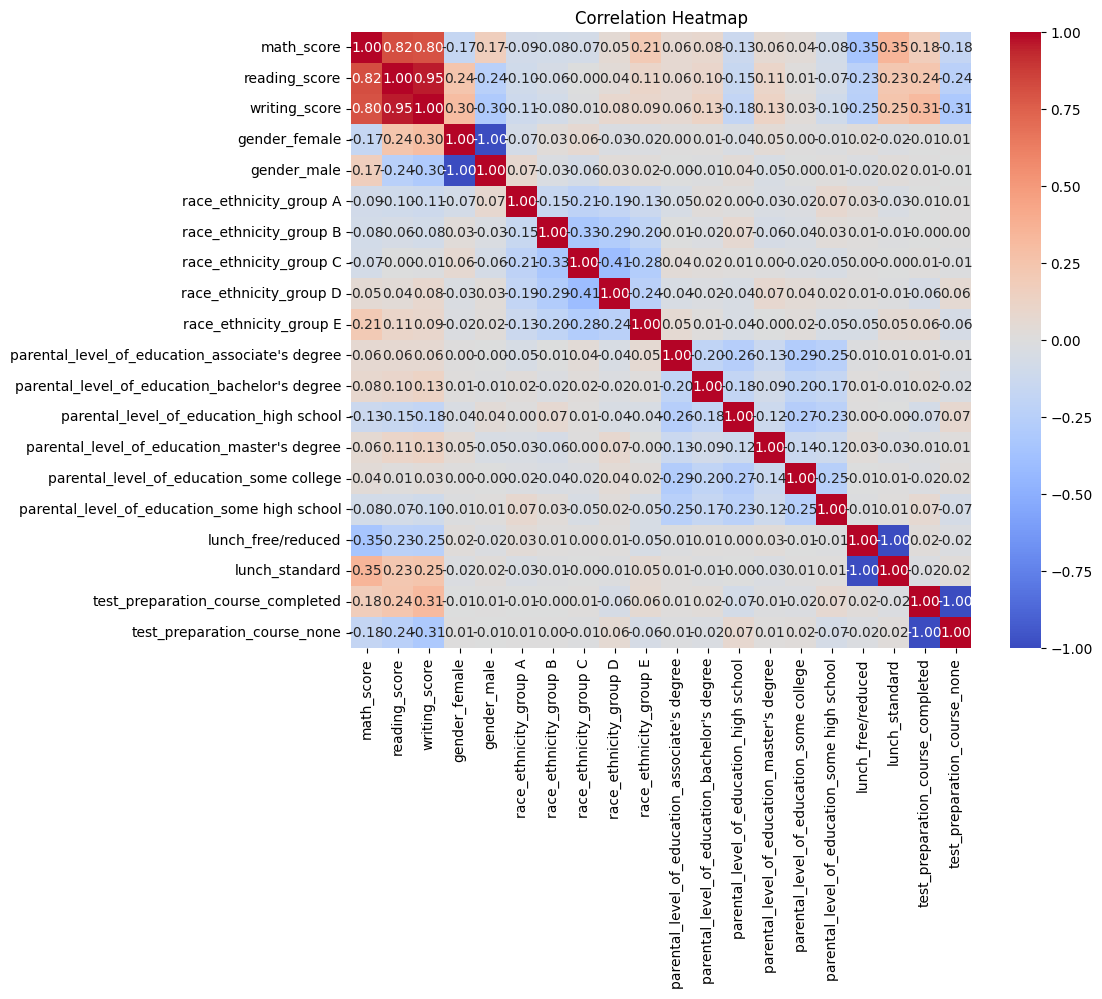

In [50]:
df_grafik = df_cleaned

df_dummies = pd.get_dummies(df_grafik)

corr_df = df_dummies.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Anallisis Heatmap :
* Heatmap menunjukkan korelasi yang berdekatan antara value pada kolom yang sama dan nyaris tidak hubunan pada value antar kolom lainnya
* Hasil korelasi ini juga kurang akurat dikarenakan variabel teruji adalah numerical dan kategorical

### Histogram Hubungan Variabel

#### Gender terhadap Nilai 

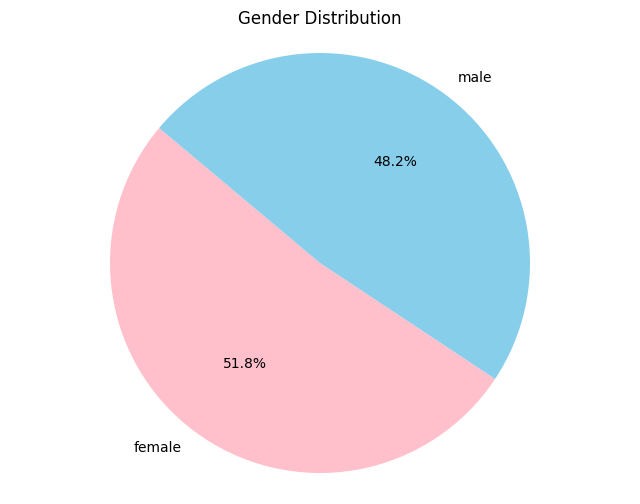

In [84]:
# Count the occurrences of each unique value in the 'gender' column
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()

Terpdapat 51.8% murid perempuan dan 48.2% murid laki-laki 

##### Nilai Math 

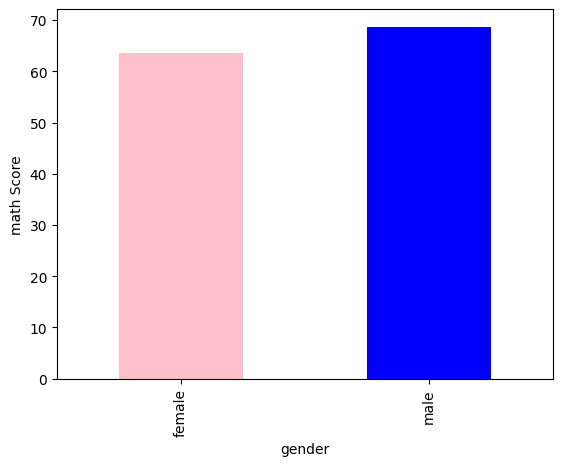

In [58]:
# Nilai rata - rata math berdasarkan gender
gender_math_mean = df.groupby('gender')['math_score'].mean().round(1)

# Warna untuk tiap gender
colors = {'female': 'pink', 'male': 'blue'}

# Plot bar untuk tiap warna 
gender_math_mean.plot(kind='bar', color=[colors[g] for g in gender_math_mean.index])

# Menambahkan label y 
plt.ylabel('math Score')

# Menampilkan plot
plt.show()

rata-rata nilai laki-laki lebih tinggi untuk ujian math

##### Nilai Reading

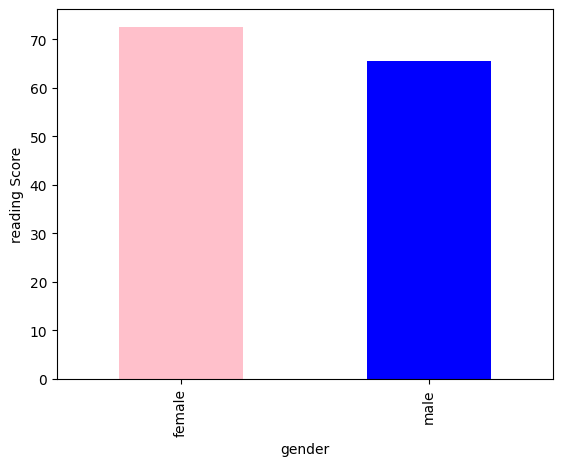

In [60]:
# Nilai rata - rata reading berdasarkan gender
gender_reading_mean = df.groupby('gender')['reading_score'].mean().round(1)

# Warna untuk tiap gender
colors = {'female': 'pink', 'male': 'blue'}

# Plot bar untuk tiap warna 
gender_reading_mean.plot(kind='bar', color=[colors[g] for g in gender_reading_mean.index])

# Menambahkan label y 
plt.ylabel('reading Score')

# Menampilkan plot
plt.show()

rata-rata nilai perempuan lebih tinggi untuk ujian reading

##### Nilai Writing

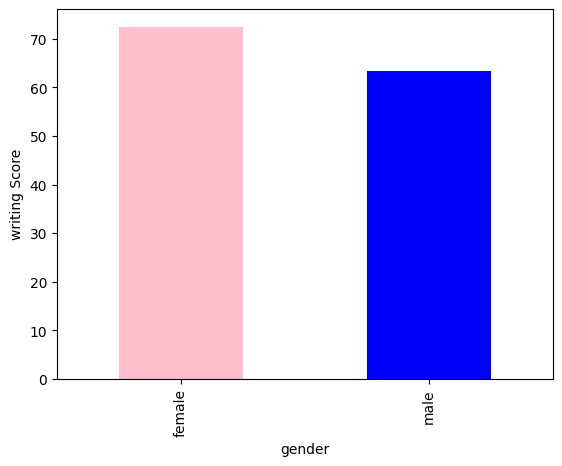

In [61]:
# Nilai rata - rata writing berdasarkan gender
gender_writing_mean = df.groupby('gender')['writing_score'].mean().round(1)

# Warna untuk tiap gender
colors = {'female': 'pink', 'male': 'blue'}

# Plot bar untuk tiap warna 
gender_writing_mean.plot(kind='bar', color=[colors[g] for g in gender_writing_mean.index])

# Menambahkan label y 
plt.ylabel('writing Score')

# Menampilkan plot
plt.show()

rata-rata nilai perempuan lebih tinggi untuk ujian writing

#### Pendidikan orangtua terhadap nilai

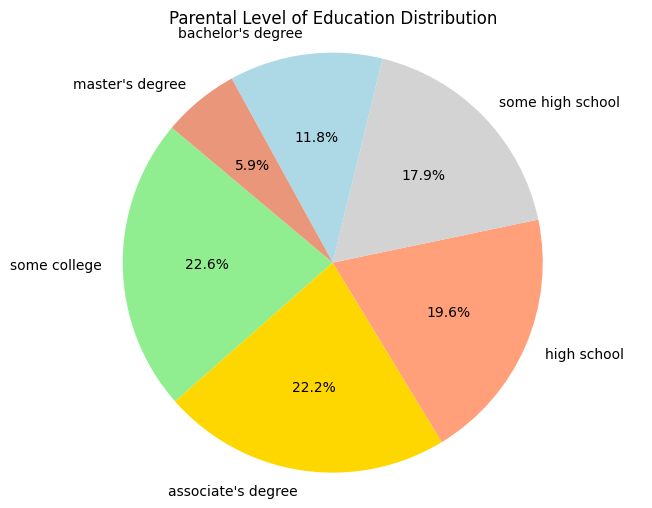

In [82]:
# Count the occurrences of each unique value in the 'parental_level_of_education' column
parental_level_of_education_counts = df['parental_level_of_education'].value_counts()

# Define colors for each unique value of parental_level_of_education
colors = {
    "bachelor's degree": '#ADD8E6',  
    'some college': '#90EE90',       
    "master's degree": '#E9967A',     
    "associate's degree": '#FFD700',  
    'high school': '#FFA07A',         
    'some high school': '#D3D3D3'     
}

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(parental_level_of_education_counts, labels=parental_level_of_education_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[p] for p in parental_level_of_education_counts.index])
plt.title('Parental Level of Education Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()

Dari data didapat persentase tingkat pendidikan orangtua murid pada seluruh murid:
* some collage : 22.6%
* master's degree : 5.9%
* bachelor's degree : 11.8% 
* some high school : 17.9%
* high school : 19.6%
* Associate degree : 22.2%

##### Nilai Math

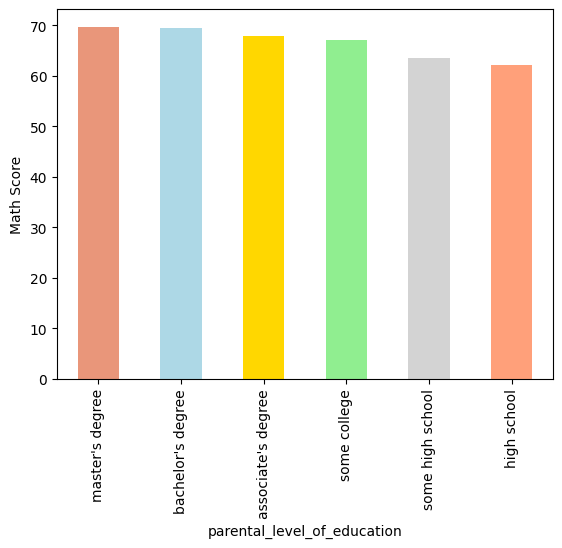

In [96]:
# Nilai rata-rata terhadap pendidikan orangtua
parental_math_mean = df.groupby('parental_level_of_education')['math_score'].mean().round(1)

# Warna tiap unique value 
colors = {
    "bachelor's degree": '#ADD8E6',  
    'some college': '#90EE90',       
    "master's degree": '#E9967A',     
    "associate's degree": '#FFD700',  
    'high school': '#FFA07A',         
    'some high school': '#D3D3D3'     
}

# Sortir parental_math_mean descending
parental_math_mean = parental_math_mean.sort_values(ascending=False)

# Plot bar tiap warna
parental_math_mean.plot(kind='bar', color=[colors[p] for p in parental_math_mean.index])

# meanmbahkan y label
plt.ylabel('Math Score')

# Menampilkan plot
plt.show()

rata - rata nilai memiliki perbedaan rata-rata untuk tiap tingkat pendidikan orangtua 

##### Nilai Reading

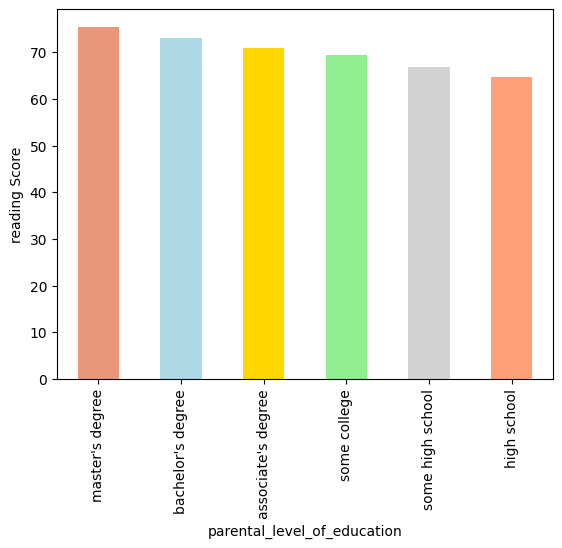

In [101]:
# Nilai rata-rata terhadap pendidikan orangtua
parental_reading_mean = df.groupby('parental_level_of_education')['reading_score'].mean().round(1)

# Warna tiap unique value 
colors = {
    "bachelor's degree": '#ADD8E6',  
    'some college': '#90EE90',       
    "master's degree": '#E9967A',     
    "associate's degree": '#FFD700',  
    'high school': '#FFA07A',         
    'some high school': '#D3D3D3'     
}

# Sortir parental_reading_mean descending
parental_reading_mean = parental_reading_mean.sort_values(ascending=False)

# Plot bar tiap warna
parental_reading_mean.plot(kind='bar', color=[colors[p] for p in parental_reading_mean.index])

# meanmbahkan y label
plt.ylabel('reading Score')

# Menampilkan plot
plt.show()

rata - rata nilai memiliki perbedaan rata-rata untuk tiap tingkat pendidikan orangtua 

##### Nilai Writing

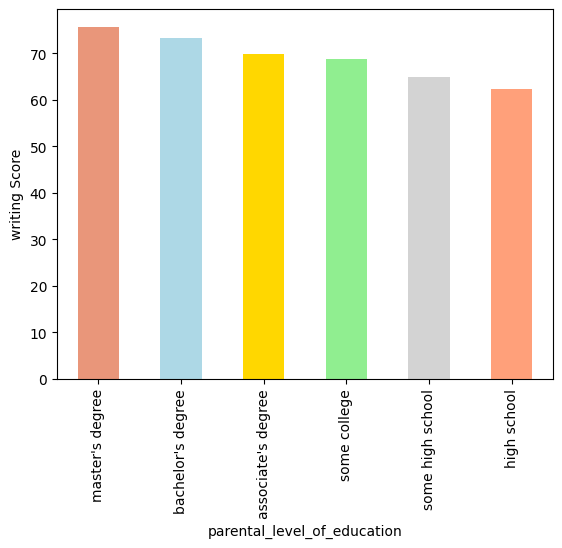

In [102]:
# Nilai rata-rata terhadap pendidikan orangtua
parental_writing_mean = df.groupby('parental_level_of_education')['writing_score'].mean().round(1)

# Warna tiap unique value 
colors = {
    "bachelor's degree": '#ADD8E6',  
    'some college': '#90EE90',       
    "master's degree": '#E9967A',     
    "associate's degree": '#FFD700',  
    'high school': '#FFA07A',         
    'some high school': '#D3D3D3'     
}

# Sortir parental_writing_mean descending
parental_writing_mean = parental_writing_mean.sort_values(ascending=False)

# Plot bar tiap warna
parental_writing_mean.plot(kind='bar', color=[colors[p] for p in parental_writing_mean.index])

# meanmbahkan y label
plt.ylabel('writing Score')

# Menampilkan plot
plt.show()

rata - rata nilai memiliki perbedaan rata-rata untuk tiap tingkat pendidikan orangtua 

#### Etnis Terhadap Nilai

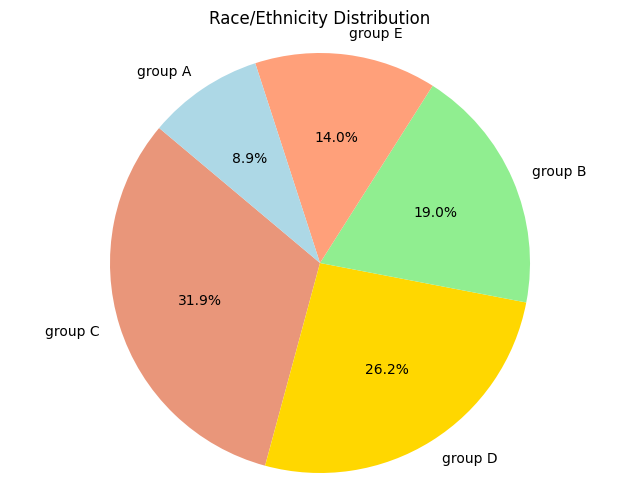

In [103]:
# Ratio etnis para murid
race_ethnicity_counts = df['race_ethnicity'].value_counts()

# Warna untuk tiap race_ethnicity
colors_race_ethnicity = {
    'group A': '#ADD8E6',  
    'group B': '#90EE90',       
    'group C': '#E9967A',     
    'group D': '#FFD700',  
    'group E': '#FFA07A'     
}

# membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(race_ethnicity_counts, labels=race_ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors_race_ethnicity[r] for r in race_ethnicity_counts.index])
plt.title('Race/Ethnicity Distribution')

# Equal aspect ratio untuk membuat pie
plt.axis('equal')

# Menampilkan the pie chart
plt.show()

Didapat data persentase etnis terhadap seluruh murid :
* group A : 8.9%
* group B : 19%
* group C : 31.9%
* group D : 26.2%
* group E : 14%

##### Nilai Matematika

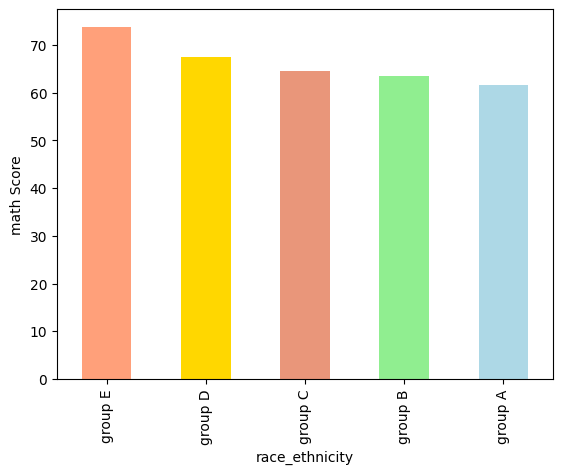

In [108]:
# Nilai rata-rata terhadap etnis siswa
race_ethnicity_mean = df.groupby('race_ethnicity')['math_score'].mean().round(1)

# Warna tiap unique value 
colors_race_ethnicity = {
    'group A': '#ADD8E6',  
    'group B': '#90EE90',       
    'group C': '#E9967A',     
    'group D': '#FFD700',  
    'group E': '#FFA07A'     
}

# Sortir race_ethnicity_mean descending
race_ethnicity_mean = race_ethnicity_mean.sort_values(ascending=False)

# Plot bar tiap warna
race_ethnicity_mean.plot(kind='bar', color=[colors_race_ethnicity[p] for p in race_ethnicity_mean.index])

# meanmbahkan y label
plt.ylabel('math Score')

# Menampilkan plot
plt.show()

rata - rata nilai pada tiap etnis memiliki perbedaan yang signifikan

##### Reading Score 

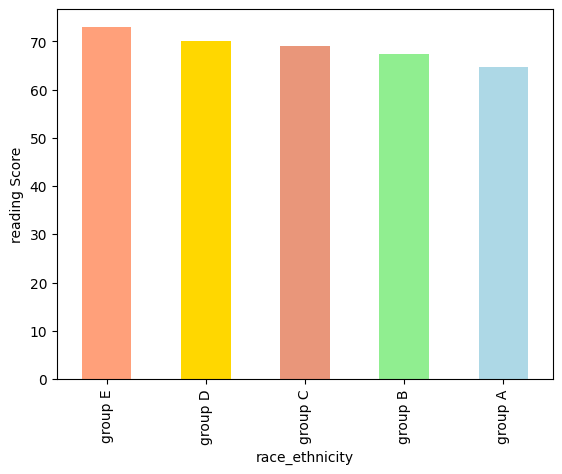

In [107]:
# Nilai rata-rata terhadap etnis siswa
race_ethnicity_mean = df.groupby('race_ethnicity')['reading_score'].mean().round(1)

# Warna tiap unique value 
colors_race_ethnicity = {
    'group A': '#ADD8E6',  
    'group B': '#90EE90',       
    'group C': '#E9967A',     
    'group D': '#FFD700',  
    'group E': '#FFA07A'     
}

# Sortir race_ethnicity_mean descending
race_ethnicity_mean = race_ethnicity_mean.sort_values(ascending=False)

# Plot bar tiap warna
race_ethnicity_mean.plot(kind='bar', color=[colors_race_ethnicity[p] for p in race_ethnicity_mean.index])

# meanmbahkan y label
plt.ylabel('reading Score')

# Menampilkan plot
plt.show()

rata - rata nilai pada tiap etnis memiliki perbedaan yang signifikan

##### Writing Score

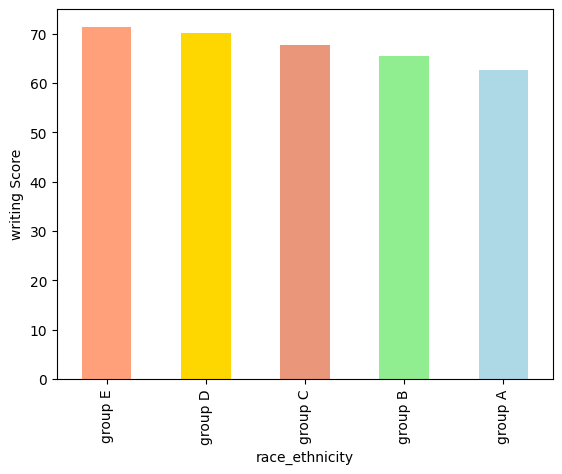

In [106]:
# Nilai rata-rata terhadap etnis siswa
race_ethnicity_mean = df.groupby('race_ethnicity')['writing_score'].mean().round(1)

# Warna tiap unique value 
colors_race_ethnicity = {
    'group A': '#ADD8E6',  
    'group B': '#90EE90',       
    'group C': '#E9967A',     
    'group D': '#FFD700',  
    'group E': '#FFA07A'     
}

# Sortir race_ethnicity_mean descending
race_ethnicity_mean = race_ethnicity_mean.sort_values(ascending=False)

# Plot bar tiap warna
race_ethnicity_mean.plot(kind='bar', color=[colors_race_ethnicity[p] for p in race_ethnicity_mean.index])

# meanmbahkan y label
plt.ylabel('writing Score')

# Menampilkan plot
plt.show()

rata - rata nilai pada tiap etnis memiliki perbedaan yang signifikan

#### Kelas latihan ujian terhadap nilai 

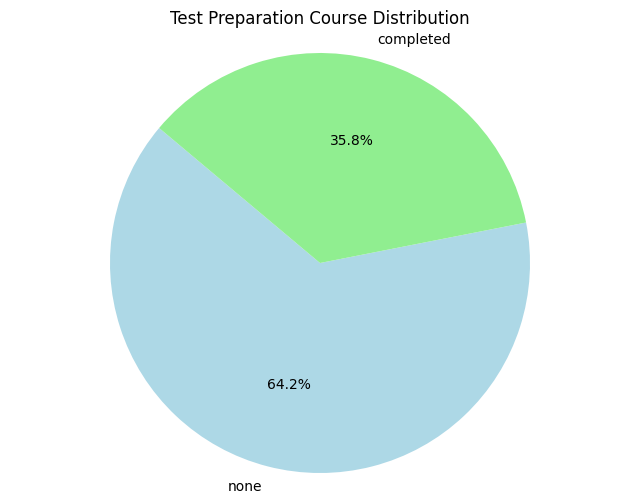

In [110]:
# Ratio murid yang mengikuti kelas persiapan ujian dan tidak 
test_prep_counts = df['test_preparation_course'].value_counts()

# warna untuk tiap test preparation course
colors_test_prep = {
    'none': '#ADD8E6',  
    'completed': '#90EE90'      
}

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(test_prep_counts, labels=test_prep_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors_test_prep[r] for r in test_prep_counts.index])
plt.title('Test Preparation Course Distribution')

# Ratio pie chart
plt.axis('equal')

# Menampilkan pie chart
plt.show()

Didapat persentase mudrid mengikuti kelas tambahan atau tidak terhadap seluruh murid :
* completed : 25.8%
* none 64.2%

##### Nilai Matematika

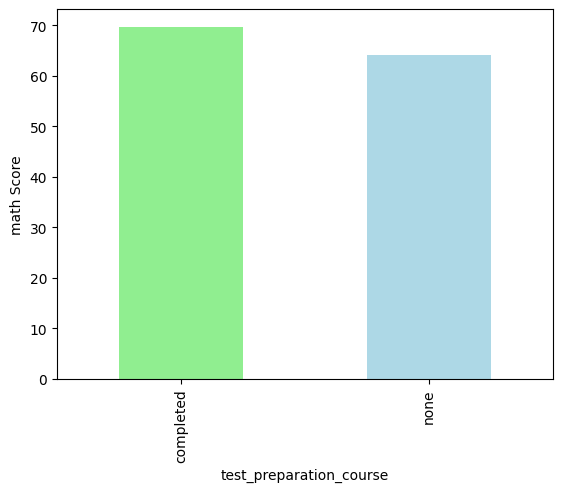

In [111]:
# Nilai rata-rata terhadap test preparation course
test_prep_mean = df.groupby('test_preparation_course')['math_score'].mean().round(1)

# Warna tiap unique value 
colors_test_prep = {
    'none': '#ADD8E6',  
    'completed': '#90EE90'      
}

# Sortir test_prep_mean descending
test_prep_mean = test_prep_mean.sort_values(ascending=False)

# Plot bar tiap warna
test_prep_mean.plot(kind='bar', color=[colors_test_prep[p] for p in test_prep_mean.index])

# meanmbahkan y label
plt.ylabel('math Score')

# Menampilkan plot
plt.show()

Terdapat perebedaan yang signikan pada  rata-rata nilai untuk tiap murid yang mengikuti atau tidak  mengikuti kelas 

##### Nilai reading


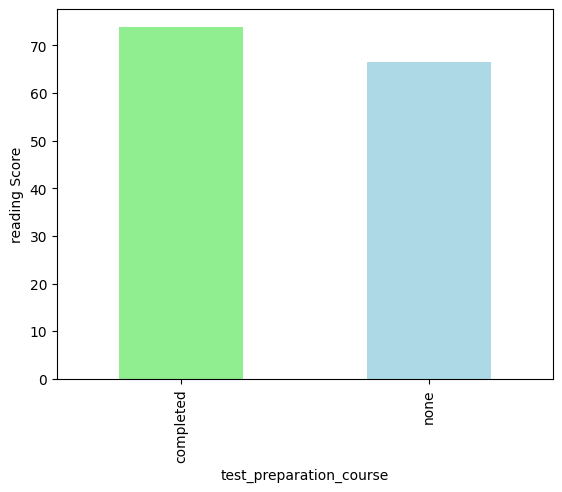

In [112]:
# Nilai rata-rata terhadap test preparation course
test_prep_mean = df.groupby('test_preparation_course')['reading_score'].mean().round(1)

# Warna tiap unique value 
colors_test_prep = {
    'none': '#ADD8E6',  
    'completed': '#90EE90'      
}

# Sortir test_prep_mean descending
test_prep_mean = test_prep_mean.sort_values(ascending=False)

# Plot bar tiap warna
test_prep_mean.plot(kind='bar', color=[colors_test_prep[p] for p in test_prep_mean.index])

# meanmbahkan y label
plt.ylabel('reading Score')

# Menampilkan plot
plt.show()

Terdapat perebedaan yang signikan pada  rata-rata nilai untuk tiap murid yang mengikuti atau tidak  mengikuti kelas 

##### Nilai Writing 

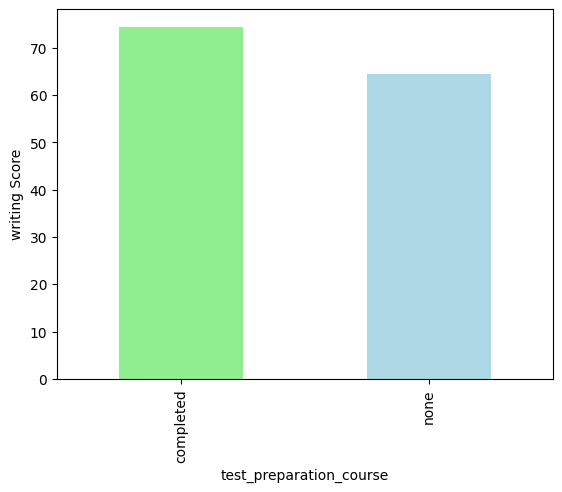

In [113]:
# Nilai rata-rata terhadap test preparation course
test_prep_mean = df.groupby('test_preparation_course')['writing_score'].mean().round(1)

# Warna tiap unique value 
colors_test_prep = {
    'none': '#ADD8E6',  
    'completed': '#90EE90'      
}

# Sortir test_prep_mean descending
test_prep_mean = test_prep_mean.sort_values(ascending=False)

# Plot bar tiap warna
test_prep_mean.plot(kind='bar', color=[colors_test_prep[p] for p in test_prep_mean.index])

# meanmbahkan y label
plt.ylabel('writing Score')

# Menampilkan plot
plt.show()

Terdapat perebedaan yang signikan pada  rata-rata nilai untuk tiap murid yang mengikuti atau tidak  mengikuti kelas 

### Analisis Hasil Hubungan tiap variabel ke Nilai Ujian 

Hasil Grafik menunjukkan hubungan nilai terhadap variabel sebagai berikut :
1. Nilai dengan gender :
    * didapatkan laki-laki sebanyak 48.2% dan perempuan sebanyak 51.8%
    * Nilai rerata laki-laki lebih tinggi untuk ujian math dibadingkan perempuan, sedangkan perempuan lebih tinggi pada ujian reading dan writing jika dibandingkan dengan laki-laki
    * Dari hasil ini dapat dijabarkan bahwa mayoritas murid laki-laki memiliki rata-rata yang lebih tinggi untuk pelajaran yang menggunakan kemampuan kognitif seperti perhitungan sedangkan murid perempuan lebih tinggi untuk pelajaran yang menggunkan kemampuan literasi
2. Nilai dengan pendidikan orangtua :
    * Didapatkan bawah dari orangtua siswa 5.9% master's degree,11.8% barchelor degree,  22.2% associate degree, 22.6% some collage, 19.6% High school, dan 17.9% some high school.
    * Dari Bar terlihat bahwa rata-rata nilai siswa berhubungan dengan pendidikan terakhir orangtua murid. Rata - rata master's degree > barchelor degree > associate dedgree, some collage > high shool > some highschool.
    * Hal ini menunjukkan bahwa nilai siswa berpengaruh terhadap tingkat pendidikan orangtua
3. Etnis terhadap nilai 
    * Didapatkan etnis siswa 8.9% adalah grup A, 19% grup B, 31.9% grup C, 26.2% grup D, dan 14% grup E
    * Berdasarkan Bar didapatkan bawah etnis memiliki pengaruh terhadap nilai ujian dimana grup E > grup C > grup D > grup B > grup A
    * Nilai etnis pengeruh terhadap rata-rata ujian
4. Kelas latihan ujian terhadap nilai ujian
    * Didapatkan bahwa sebanyak 64.2% siswa tidak mengikuti kelas dan 35.8% siswa mengikuti kelas
    * Berdasarkan grafik bar rata-rata nilai untuk semua pelajaran lebih tinggi untuk siswa yang mengikuti kelas latihan ujian ketimbang yang tidak mengikuti kelas latihan ujian
    * Dari grafik diketahui bahwa kelas persiapan mempengaruhi nilai dari ujian.

Dari analisis diketahui bahwa keempat variabel ini mempengaruhi nilai ujian

# **Kesimpulan**

* Dari hasil uji statistik didapatkan bahwa faktor yang mempengaruhi nilai siswa adalah gender, etnis, pendidikan orang tua, dan mengikuti kelas persiapan ujian atau tidak
* Hasil diagram pie dan bar membuktikkan hasil pengujian anova dimana keempat variabel tersebut memang berpengaruh.

# Saran

Dari variabel yang didapatkaan berikut solusi yang dapat disarankan untuk meningkatkan nilai rata-rata murid
1. Nilai dengan gender :
    * Untuk meningkatkan rata-rata nilai reading dan writing untuk murid laki-laki dan matemtika untuk perempuan, diperlukan perhatian khusus dengan cara mengambil data survey tambahan seperti mengapa mereka kesulitan untuk mendapatkan nilai tinggi pada mata pelajaran tersebut. Dari data ini dapat diketahui apakah penyebabnya dari faktor ketertarikan dengan materi, ketelitian, atau pun faktor lainnya. Apabila dari ketertarikan, topik literasi dapat disesuaikan dengan topik trend yang sedang ada pada siswa agar mereka lebih tertarik dalam mempelajarinya dan juga dapat diberikan latihan - latihan yang lebih menarik untuk laki - laki dan perempuan
2. Nilai dengan pendidikan :
    * Dapat dibuat sebuah program untuk orangtua muridn, dimana pada program tersebut para orangtua dapat sharing mengenai bagaimana caranya mereka dalam mendidik anakanya, program sharing ini dapat memberikan masukan bagi para orangtua murid yang masih belum mengetahui cara mengajarkan materi, atau melakukan kontrol belajar anaknya dengan baik.
3. Nilai dengan Etnis :
    * Dapat membuat kelompok belajar dengan menggabungkan berbagai kelompok etnis pada kelompok belajarnya, dengan ini cara belajar murid dari tiap etnis dapat lebih membaur
4. Nilai dengan kelas latihan ujian :
    * Membuat kelas latihan ujian menjadi kelas yang wajib diikuti seluruh murid, terutama murid - murdi yang nilainya masih jauh dibawah target